# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Jasmita/Downloads/Training.csv")

In [3]:
#understanding the data : EDA
data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [4]:
data.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04
550175,NTM1,X1,A3,DIRECT,Small,Powder,Nov-20,139.42


In [5]:
data.shape

(550176, 8)

In [6]:
data.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [7]:
data.nunique()

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        4529
dtype: int64

In [8]:
data.isnull().sum()


ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

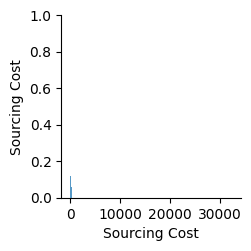

In [10]:
#anylysis of relationship
sns.pairplot(data)


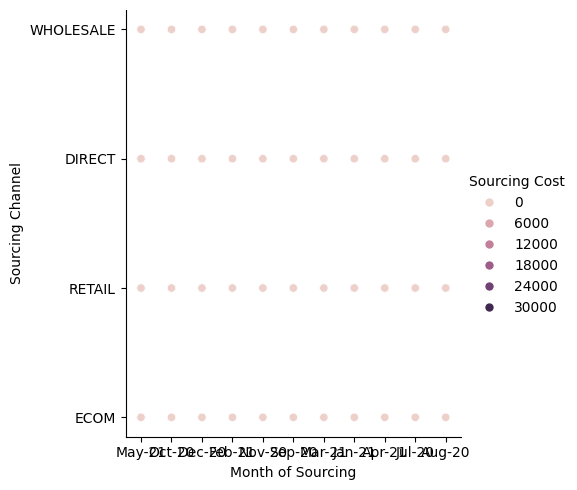

In [17]:
sns.relplot(x='Month of Sourcing',y='Sourcing Channel',hue='Sourcing Cost',data=data)

C:\Users\Jasmita\AppData\Local\Temp\ipykernel_13584\2530515667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sourcing Cost'])


<Axes: xlabel='Sourcing Cost', ylabel='Density'>

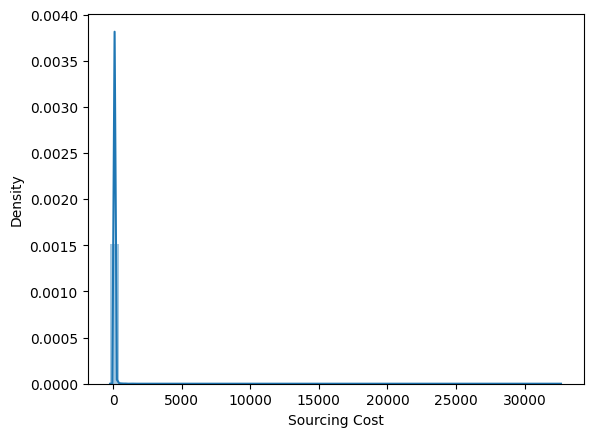

In [13]:
sns.distplot(data['Sourcing Cost'])

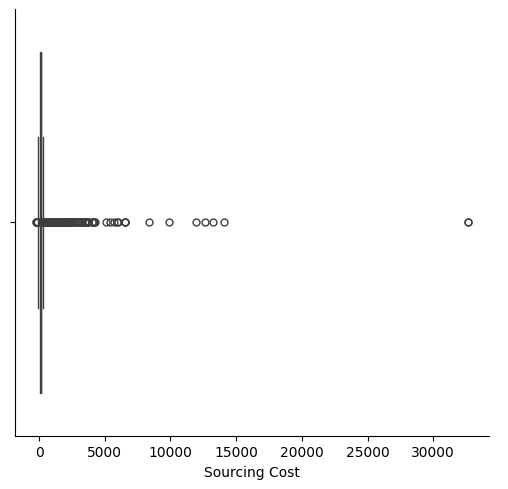

In [14]:
sns.catplot(x='Sourcing Cost',kind='box',data=data)

# Handling Outliers

<Axes: ylabel='Sourcing Cost'>

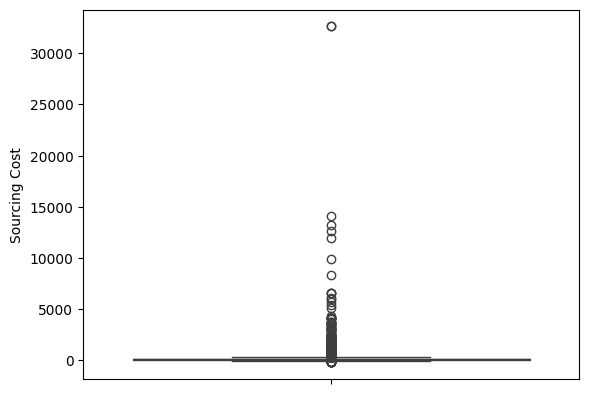

In [15]:
#to see outliers 
sns.boxplot(data['Sourcing Cost'])

In [16]:
#handling outliers using z-score
upper_limit = data['Sourcing Cost'].mean()+ 3*data['Sourcing Cost'].std()
lower_limit = data['Sourcing Cost'].mean()- 3*data['Sourcing Cost'].std()
print("upper:",upper_limit)
print("lower:",lower_limit)

upper: 421.98756510955866
lower: -204.3529921728984


In [18]:
#finding outliers
data.loc[(data['Sourcing Cost'] > upper_limit) | (data['Sourcing Cost'] < lower_limit)]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
1098,NTM2,X1,A29,DIRECT,Small,Powder,Dec-20,1033.51
1230,NTM3,X1,A35,DIRECT,Small,Liquid,Jan-21,548.62
1267,NTM1,X1,A29,DIRECT,Small,Powder,Jan-21,772.44
1385,NTM3,X1,A35,DIRECT,Small,Liquid,Dec-20,891.67
1533,NTM1,X1,A29,DIRECT,Small,Powder,Feb-21,427.94
...,...,...,...,...,...,...,...,...
549588,NTM2,X1,A29,DIRECT,Large,Powder,Mar-21,483.95
549589,NTM2,X1,A29,DIRECT,Large,Powder,Feb-21,495.22
549942,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,Oct-20,3705.00
549946,NTM2,X1,A38,DIRECT,Small,Powder,Oct-20,457.14


In [19]:
#trimming 
new_data= data.loc[(data['Sourcing Cost'] < upper_limit) & (data['Sourcing Cost'] > lower_limit)]
print("old data:",len(data))
print("new data:",len(new_data))
print("outliers:",len(data)-len(new_data))

old data: 550176
new data: 548812
outliers: 1364


<Axes: ylabel='Sourcing Cost'>

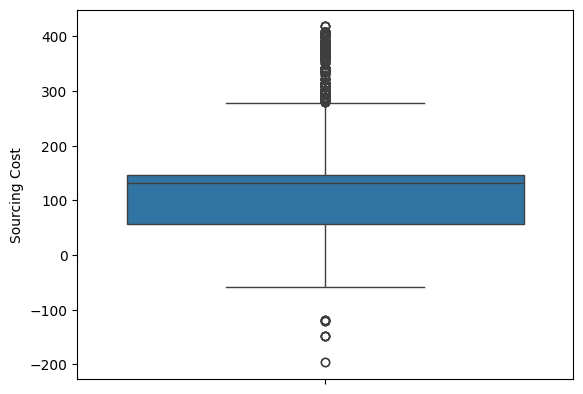

In [20]:
sns.boxplot(new_data['Sourcing Cost'])

<Axes: ylabel='Sourcing Cost'>

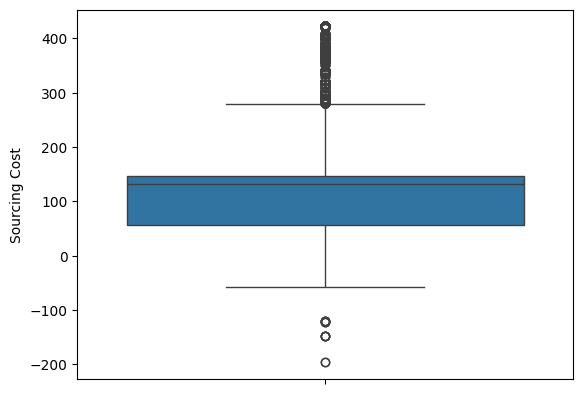

In [21]:

#capping
new_data= data.copy()
new_data.loc[new_data['Sourcing Cost'] > upper_limit,'Sourcing Cost'] = upper_limit
new_data.loc[new_data['Sourcing Cost'] < lower_limit,'Sourcing Cost'] = lower_limit
sns.boxplot(new_data['Sourcing Cost'])

In [22]:
len(new_data)

550176

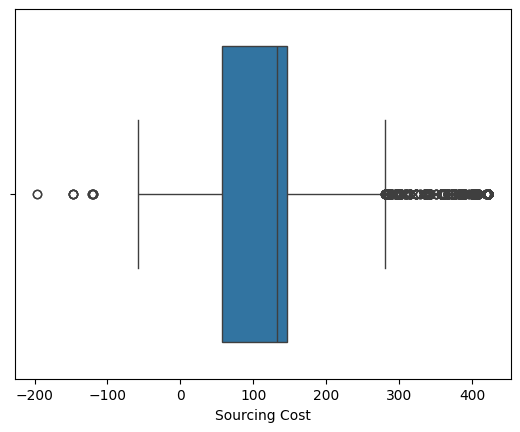

In [23]:
import matplotlib.pyplot as plt

sns.boxplot(x=new_data['Sourcing Cost'])
plt.xlabel('Sourcing Cost')
plt.show()

In [24]:
#percentile
upper= data['Sourcing Cost'].quantile(0.99)
lower= data['Sourcing Cost'].quantile(0.01)
print("upper",upper)
print("lower:",lower)

upper 224.18
lower: 0.0


<Axes: ylabel='Sourcing Cost'>

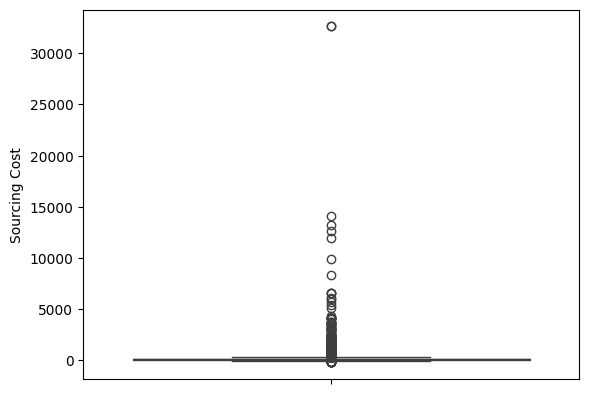

In [25]:
sns.boxplot(data['Sourcing Cost'])

In [26]:
data.loc[(data['Sourcing Cost'] > upper) | (data['Sourcing Cost'] < lower)]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
495,NTM2,X1,A29,DIRECT,Small,Powder,Jan-21,334.88
533,NTM3,X1,A35,DIRECT,Small,Liquid,Nov-20,342.40
551,NTM2,X1,A29,DIRECT,Small,Powder,Jan-21,334.88
579,NTM3,X1,A35,DIRECT,Small,Liquid,Feb-21,401.25
680,NTM2,X1,A28,DIRECT,Large,Liquid,Jul-20,237.67
...,...,...,...,...,...,...,...,...
549874,NTM2,X1,A29,DIRECT,Large,Powder,Dec-20,233.27
549942,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,Oct-20,3705.00
549946,NTM2,X1,A38,DIRECT,Small,Powder,Oct-20,457.14
549985,NTM2,X1,A29,DIRECT,Large,Powder,Feb-21,992.24


In [27]:
#trimming 
new_data= data.loc[(data['Sourcing Cost'] <= upper) & (data['Sourcing Cost'] >= lower)]
print("old data:",len(data))
print("new data:",len(new_data))
print("outliers:",len(data)-len(new_data))

old data: 550176
new data: 544616
outliers: 5560


<Axes: ylabel='Sourcing Cost'>

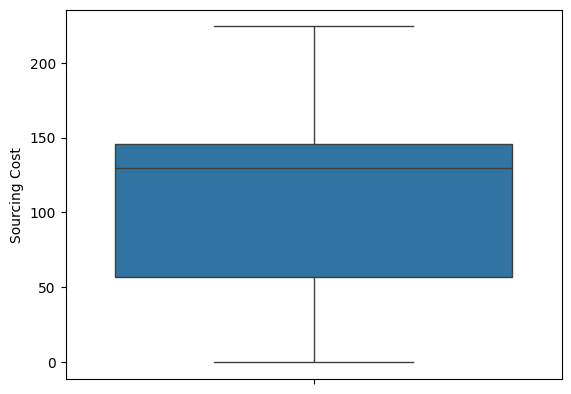

In [28]:
sns.boxplot(new_data['Sourcing Cost'])

<Axes: ylabel='Sourcing Cost'>

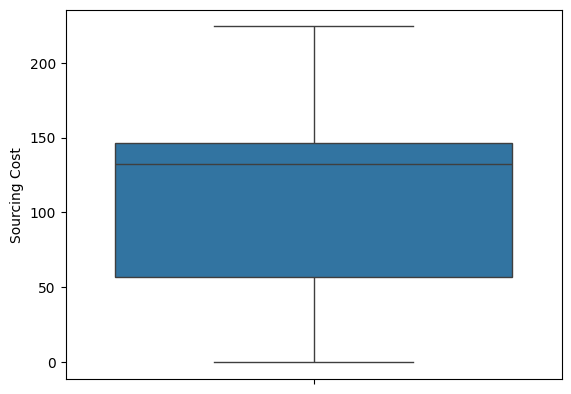

In [29]:
#capping
new_data= data.copy()
new_data.loc[new_data['Sourcing Cost'] > upper,'Sourcing Cost'] = upper
new_data.loc[new_data['Sourcing Cost'] < lower,'Sourcing Cost'] = lower
sns.boxplot(new_data['Sourcing Cost'])

In [30]:
len(new_data)


550176

### Structure of data before

C:\Users\Jasmita\AppData\Local\Temp\ipykernel_13584\3663066091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sourcing Cost'])


<Axes: xlabel='Sourcing Cost', ylabel='Density'>

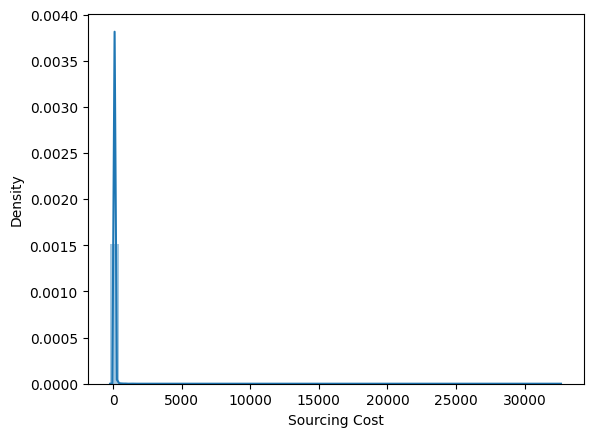

In [32]:
sns.distplot(data['Sourcing Cost'])


### Structure of data after handling outliers 

C:\Users\Jasmita\AppData\Local\Temp\ipykernel_13584\3409755388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Sourcing Cost'])


<Axes: xlabel='Sourcing Cost', ylabel='Density'>

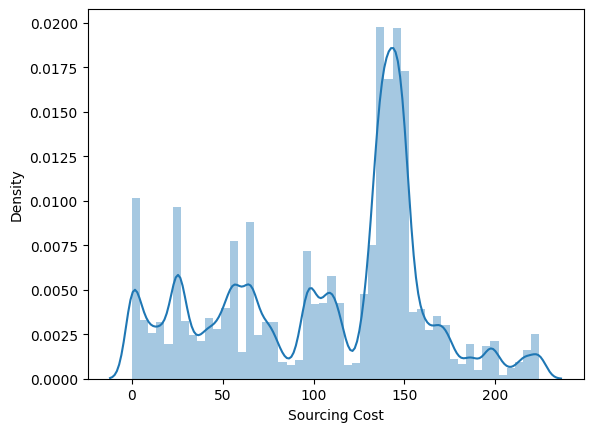

In [33]:
sns.distplot(new_data['Sourcing Cost'])


In [34]:
data=new_data

# XGB Regressor 

In [35]:
#using gradient boosting : XGBRegressor 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib  # Import joblib module
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor  

training_data = data
testing_data = pd.read_csv("C:/Users/Jasmita/Downloads/Testing.csv")

# Combine training and testing data for preprocessing
combined_data = pd.concat([training_data, testing_data], ignore_index=True)

# Split data into features and target variable for training and testing
X_train = training_data.drop(columns=['Sourcing Cost'])
y_train = training_data['Sourcing Cost']
X_test = testing_data.drop(columns=['Sourcing Cost'])
categorical_features = X_train.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# Define the pipeline with XGBoost regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(eta=0.1999,gamma=53,max_depth=6, min_child_weight=1,  reg_alpha=0, n_estimators=1000, 
                              learning_rate=0.1
                               ))  
])
# Fit the model
pipeline.fit(X_train, y_train)
# Save the trained model to a file
joblib.dump(pipeline, 'trained_model_xgboost.pkl')
# Load the saved model
pipeline = joblib.load('trained_model_xgboost.pkl')
# Generate predictions for the testing data
june_21_prediction = pipeline.predict(X_test)
# Calculate performance metrics
mae = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mse = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction)
r2 = r2_score(testing_data['Sourcing Cost'], june_21_prediction)
medae = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mape = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction)
print("Performance metrices for XGbRegressor: \n")
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)
print('Median Absolute Error (MedAE):', medae)
print('Mean Absolute Percentage Error (MAPE):', mape)

Performance metrices for XGbRegressor: 

Mean Absolute Error (MAE): 16.37233628074328
Mean Squared Error (MSE): 1079.6444785491233
R-squared (R2) Score: 0.6020415935724674
Median Absolute Error (MedAE): 4.116790771484375
Mean Absolute Percentage Error (MAPE): 0.42474132179943863
